In [1]:
# Importamos todas las librerias que vamos a utilizar 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [18]:
# Leemos todos los archivos que vamos a utilizar 
internet_penetracion_1 = pd.read_csv('data/01-Internet_Penetracion.csv')
internet_penetracion_2 = pd.read_csv('data/02-Internet_Penetracion.csv')
interent_baf_2 = pd.read_excel('data\Accesosabandaanchaybandaangostaporprovincia_2750201699935555944.xlsx')
internet_acceso_por_tecnologia_1 = pd.read_excel('data\Internet_Accesos-por-tecnologia (1).xlsx')
historico_velocidad_internet = pd.read_excel('data\historico_velocidad_internet.xlsx')
internet_ingresos = pd.read_excel('data\Internet_Ingresos (1).xlsx')
listado_localidad_internet = pd.read_csv('data/16-Listadodelocalidadesconconectividadainternet_2750221699377880537.csv')

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [19]:
# Revisamos el priemer df
internet_penetracion_1.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [20]:
# Revisamos
internet_penetracion_1.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [21]:
internet_penetracion_1['Accesos por cada 100 hogares'] = internet_penetracion_1['Accesos por cada 100 hogares'].str.replace('.', '').str.replace(',', '.').astype(float)

In [22]:
# Calculamos el promedio para las provincias
promedio = internet_penetracion_1.groupby('Provincia')['Accesos por cada 100 hogares'].mean()
# Lo almacenamos en df
resultados_promedio = pd.DataFrame({'Provincia': promedio.index, 'Promedio general': promedio.values})
# Ordenamos para poder mostrar en forma acendente
orden = resultados_promedio.sort_values(by='Promedio general', ascending=False)
# Mostrar el df
orden

,Provincia,Promedio general
1,Capital Federal,113.639167
22,Tierra Del Fuego,78.798611
10,La Pampa,71.277222
6,Córdoba,66.986111
0,Buenos Aires,63.979444
20,Santa Fe,62.836667
14,Neuquén,62.373889
15,Río Negro,53.567500
4,Chubut,53.114444
7,Entre Ríos,51.164444


* El presente informe nos detalla el promedio geneneral con respecto a cada provincia;
por un lado, Capital Federal tiene un promedio 113.639167 colocandose como el top 1 y 
por otro lado en utlimo puesto se encuentra Formosa con un promedio 26.581389 colocandose
en el ultimo lugar 

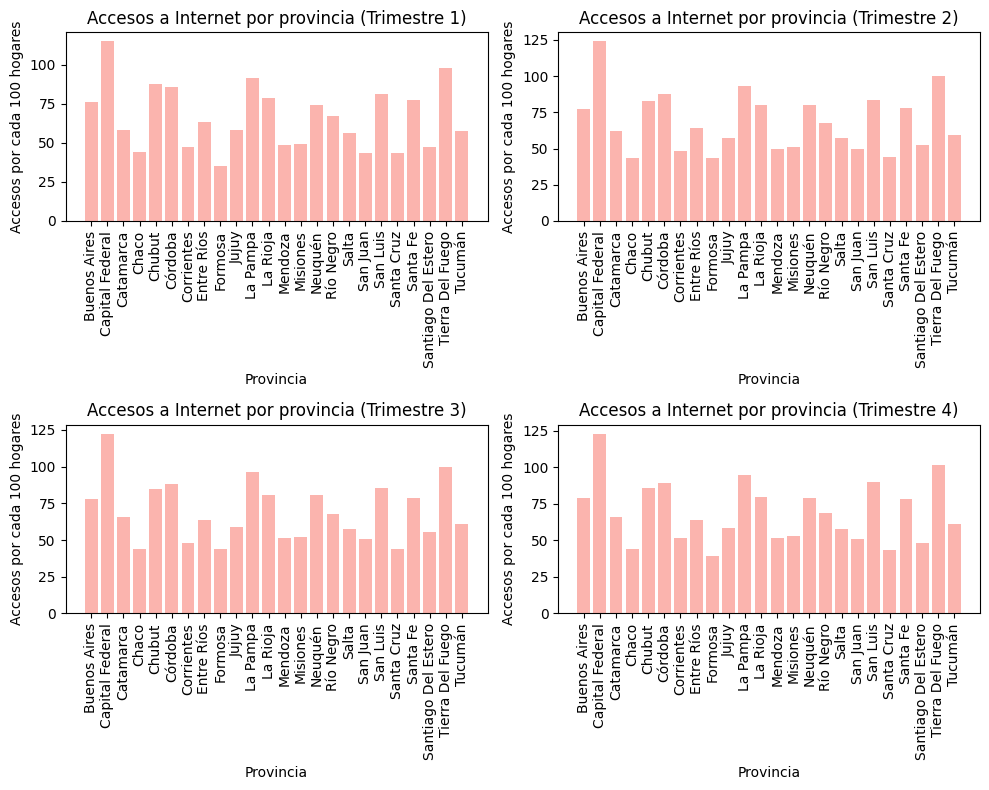

In [23]:
# Crear una figura y cuatro subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
color_pastel = sns.color_palette("Pastel1")[0]

# Iterar sobre los trimestres del 1 al 4
for trimestre, ax in zip(range(1, 5), axes.flatten()):
    
    # Filtrar los datos para el trimestre actual
    df_trimestre = internet_penetracion_1[internet_penetracion_1['Trimestre'] == trimestre]

    # Crear el gráfico de barras en el subplot correspondiente
    ax.bar(df_trimestre['Provincia'], df_trimestre['Accesos por cada 100 hogares'], color= color_pastel)
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Accesos por cada 100 hogares')
    ax.set_title(f'Accesos a Internet por provincia (Trimestre {trimestre})')
    ax.tick_params(axis='x', rotation=90)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

* En la imagen se mueetra cuatro graficos(por trimestres) en donde cada uno muestra cuanto fue el acceso por cada 100 hogares con respecto a cada provicnia 

In [24]:
dfa = internet_penetracion_1[['Accesos por cada 100 hogares']]

Q1 = dfa.quantile(0.25)
Q3 = dfa.quantile(0.75)
IQR = Q3 - Q1

outliers = ((dfa < (Q1 - 1.5 * IQR)) | (dfa > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = internet_penetracion_1[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2022,4,Capital Federal,122.73
25,2022,3,Capital Federal,122.28
49,2022,2,Capital Federal,121.31
73,2022,1,Capital Federal,111.80
97,2021,4,Capital Federal,111.27
121,2021,3,Capital Federal,111.27
145,2021,2,Capital Federal,110.14
169,2021,1,Capital Federal,108.42
193,2020,4,Capital Federal,108.31
313,2019,3,Capital Federal,112.65


* visualizamos todos los outliers , en donde se muestra que hay un registro amplio solamente Capital Federal desde el 2014 hasta el 2022

In [25]:
# Guardamos los cambios que realizamos para poder utlizarlos posteriormente
internet_penetracion_1.to_csv('data/01-Internet_Penetracion.csv', index=False) 

In [26]:
# Revisamos el segundo df
internet_penetracion_2.head(5)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


In [27]:
#Se eliminan duplicados
internet_penetracion_1=internet_penetracion_1.drop_duplicates()
#Asignamos 'sin dato' a cada columna que contenga un vacio
internet_penetracion_1.fillna('Sin dato', inplace=True)

In [28]:
# Revisamos
internet_penetracion_2.head(5)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


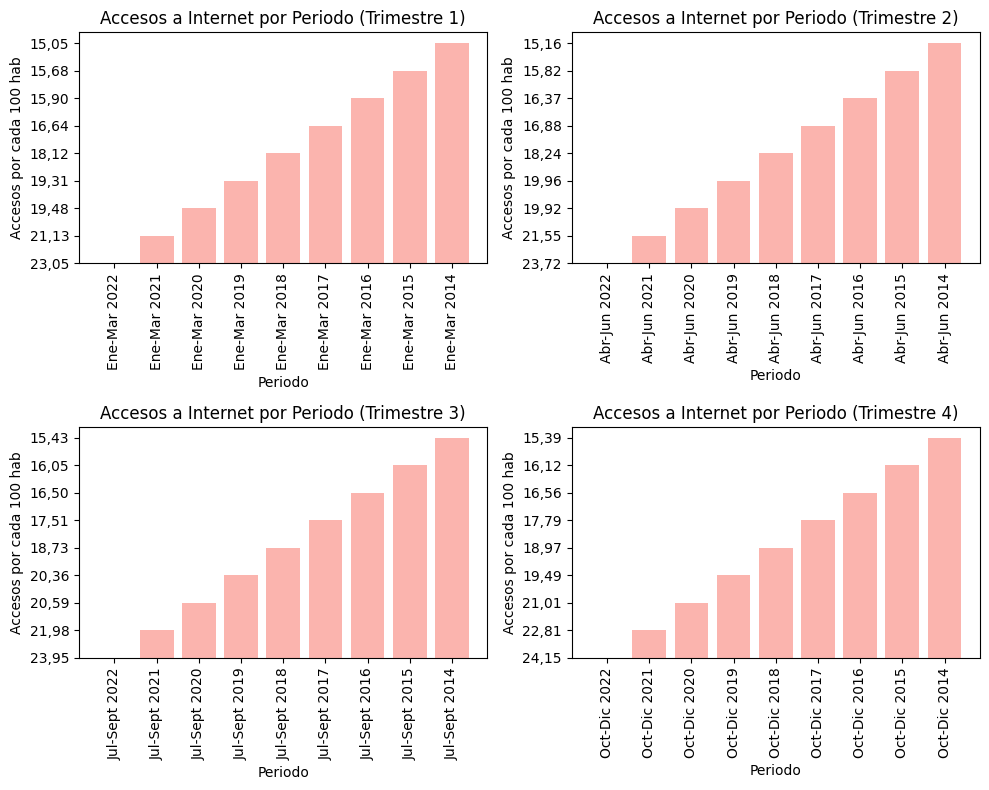

In [29]:
# Crear una figura y cuatro subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
color_pastel = sns.color_palette("Pastel1")[0]

# Iterar sobre los trimestres del 1 al 4
for trimestre, ax in zip(range(1, 5), axes.flatten()):
    
    # Filtrar los datos para el trimestre actual
    df_trimestre = internet_penetracion_2[internet_penetracion_2['Trimestre'] == trimestre]

    # Crear el gráfico de barras en el subplot correspondiente
    ax.bar(df_trimestre['Periodo'], df_trimestre['Accesos por cada 100 hab'], color= color_pastel)
    ax.set_xlabel('Periodo')
    ax.set_ylabel('Accesos por cada 100 hab')
    ax.set_title(f'Accesos a Internet por Periodo (Trimestre {trimestre})')
    ax.tick_params(axis='x', rotation=90)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

* En la imagen se mueetra cuatro graficos(por trimestres) en donde cada uno muestra cuanto fue el acceso por cada 100 hogares con respecto a cada trimestre en los disintos años.

In [30]:
# Guardamos los cambios que realizamos para poder utlizarlos posteriormente
internet_penetracion_2.to_csv('data/02-Internet_Penetracion.csv', index=False) 

In [3]:
# Revisamos el tercer df 
interent_baf_2.head(5)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5000,60,5
1,2022,4,Capital Federal,2000,20,2
2,2022,4,Catamarca,71000,10,71
3,2022,4,Chaco,144000,50,144
4,2022,4,Chubut,168000,9040,169


In [32]:
# Revisamos con que tipo de datos estamos trabajando en internet_baf_2
interent_baf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [33]:
# Describimos nuestro para ver los distintos datos como promedio, conteo , etc los cuales posteriormente nos puede servir 
interent_baf_2.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,864.000000,862.000000,864.000000
mean,2018.000000,2.500000,137.326389,150.595128,137.636574
std,2.583484,1.118682,180.812265,230.167337,180.798813
min,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,2016.000000,1.750000,39.000000,2.000000,39.750000
50%,2018.000000,2.500000,90.500000,16.000000,91.000000
75%,2020.000000,3.250000,143.000000,253.500000,143.250000
max,2022.000000,4.000000,987.000000,998.000000,987.000000


In [34]:
#Eliminamos los valores nulos
interent_baf_2.dropna(inplace=True)

In [35]:
interent_baf_2['Dial up'] = interent_baf_2['Dial up'].fillna(0).astype(str).str.replace('.', '').astype(int)
interent_baf_2['Banda ancha fija'] = interent_baf_2['Banda ancha fija'].fillna(0).astype(str).str.replace('.', '').astype(int)
interent_baf_2['Total'] = interent_baf_2['Total'].fillna(0).astype(str).str.replace('.', '').astype(int)

In [36]:
interent_baf_2.head(5)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,60,5
1,2022,4,Capital Federal,2,20,2
2,2022,4,Catamarca,71,10,71
3,2022,4,Chaco,144,50,144
4,2022,4,Chubut,168,9040,169


In [37]:
# Multiplicamos a Banda ancha fija por 1000  
interent_baf_2['Banda ancha fija'] = interent_baf_2['Banda ancha fija']*1000

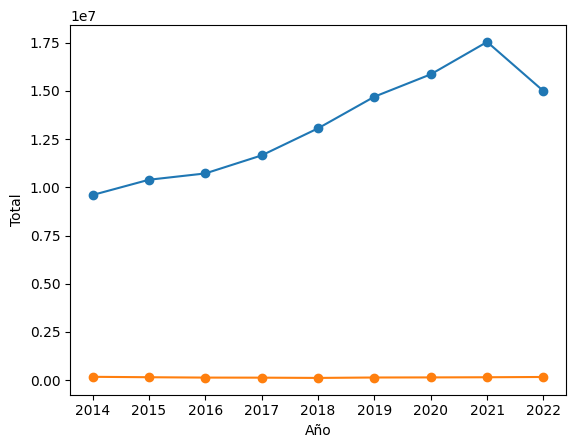

In [38]:
df_grouped = interent_baf_2.groupby('Año').sum()

plt.plot(df_grouped.index, df_grouped['Banda ancha fija'], marker='o', label='Banda ancha fija')

# Crear el gráfico de líneas para Dial up
plt.plot(df_grouped.index, df_grouped['Dial up'], marker='o', label='Dial up')

# Configura los ejes y etiquetas
plt.xlabel('Año')
plt.ylabel('Total')

# Muestra el gráfico
plt.show()

* En la linea azul el cual es banda ancha fija  nos presenta un comportamiento creciente atravez de los años , aun que del año 2021 al año 2022 hay una minima decadencia.

* Por otro lado en lo que respecta el comportamiento de Dial up , nos muestra que es constante y con una cierta caida atravez de los años.

In [39]:
# Guardamos los cambios realizados para posteriormente utlizarlos
interent_baf_2.to_excel('data\Accesosabandaanchaybandaangostaporprovincia_2750201699935555944.xlsx', index=False)

In [4]:
# Revisamos nuestro cuarto df 
internet_acceso_por_tecnologia_1.head(6) 

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
5,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021


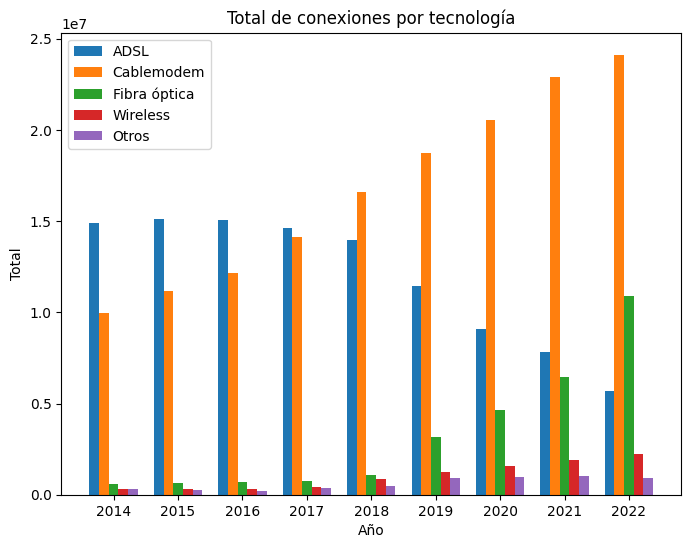

In [5]:
# Calcular la suma de los años
df_suma = internet_acceso_por_tecnologia_1.groupby('Año').sum().reset_index()

# Configurar los datos para el gráfico
years = df_suma['Año']
adsl = df_suma['ADSL']
cablemodem = df_suma['Cablemodem']
fibra_optica = df_suma['Fibra óptica']
wireless = df_suma['Wireless']
otros = df_suma['Otros']

# Crear el gráfico de barras agrupados
x = range(len(years))
width = 0.15

fig, ax = plt.subplots(figsize=(8, 6))  # Tamaño del gráfico

rects1 = ax.bar(x, adsl, width, label='ADSL')
rects2 = ax.bar([i + width for i in x], cablemodem, width, label='Cablemodem')
rects3 = ax.bar([i + width*2 for i in x], fibra_optica, width, label='Fibra óptica')
rects4 = ax.bar([i + width*3 for i in x], wireless, width, label='Wireless')
rects5 = ax.bar([i + width*4 for i in x], otros, width, label='Otros')

# Configurar el eje x
ax.set_xticks([i + width*2 for i in x])
ax.set_xticklabels(years)
ax.set_xlabel('Año')

# Configurar el eje y
ax.set_ylabel('Total')
ax.set_title('Total de conexiones por tecnología')
ax.legend()

# Mostrar el gráfico
plt.show()

* En la tabla conexiones por tecnologia, nos muestra las diversas conexiones y entre ella vemos que fibra optica tiene un crecimiento exponecial atravez de los años.
* Por otro lado el que sigue liderando es Cablemodem.

In [42]:
# Revisamos nuestro quiento df
historico_velocidad_internet.head(5)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


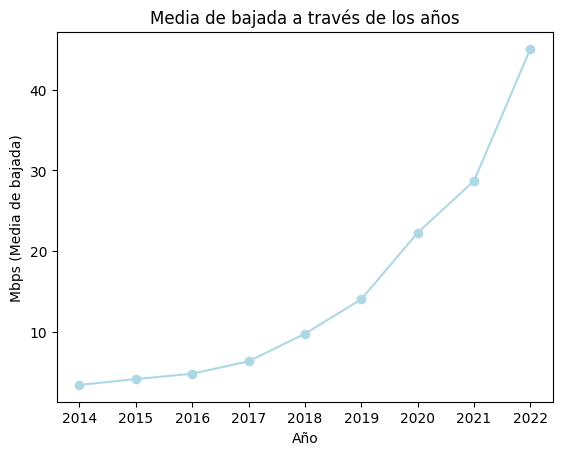

In [59]:
# Agrupar los datos por año y calcular el promedio de "Mbps (Media de bajada)"
df_grouped = historico_velocidad_internet.groupby("Año")["Mbps (Media de bajada)"].mean()
# Crear el gráfico de línea con color personalizado
plt.plot(df_grouped.index, df_grouped.values, marker="o", color="#ADD8E6")

# Configurar etiquetas de los ejes
plt.xlabel("Año")
plt.ylabel("Mbps (Media de bajada)")

# Configurar título del gráfico
plt.title("Media de bajada a través de los años")

# Mostrar el gráfico
plt.show()

* En el grafico visualizamos que hay un crecimiento de la media de bajada atravez de los años y llegando al pico en el año 2022

In [60]:
# Describimos nuestro df para obtener informacion como la media, el conteo los ucales nos va servir mas adelante
historico_velocidad_internet.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,15.375182
std,2.583484,1.118682,18.320956
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.750000,4.316775
50%,2018.000000,2.500000,7.416094
75%,2020.000000,3.250000,19.709719
max,2022.000000,4.000000,182.860000


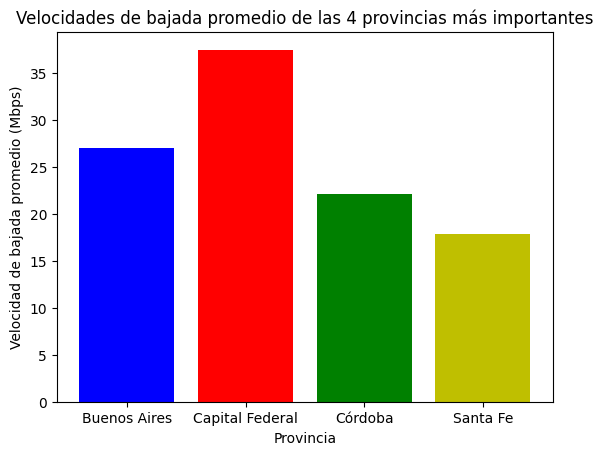

In [61]:
# Filtrar el dataframe para obtener los datos de las cuatro provincias
provincias = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe']
df_filtered = historico_velocidad_internet[historico_velocidad_internet['Provincia'].isin(provincias)]

# Calcular las velocidades de bajada promedio por provincia
velocidades_promedio = df_filtered.groupby('Provincia')['Mbps (Media de bajada)'].mean()

colores = ['b', 'r', 'g', 'y']

plt.bar(velocidades_promedio.index, velocidades_promedio.values, color=colores)
plt.xlabel('Provincia')
plt.ylabel('Velocidad de bajada promedio (Mbps)')
plt.title('Velocidades de bajada promedio de las 4 provincias más importantes')

plt.show()

* Tomamos referencia a 4 provincias ( Buenos Aires, Capital Federal, Cordoba y Santa Fe).

* Podemos ver que la velociad de bajada promedio es mayor en Capital Federal superando los 35Mbps y el menor promedio es Santa fe que esta por debajo de 20Mbps.

In [64]:
# Guardamos los cambios realizados para posteriormente utlizarlos.
historico_velocidad_internet.to_excel('data\historico_velocidad_internet.xlsx', index=False) 

In [8]:
# Revizamos nuestro sexto df 
internet_ingresos.head(5)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


In [9]:
# Vemos si temos datos duplicados 
internet_ingresos.duplicated().sum()

0

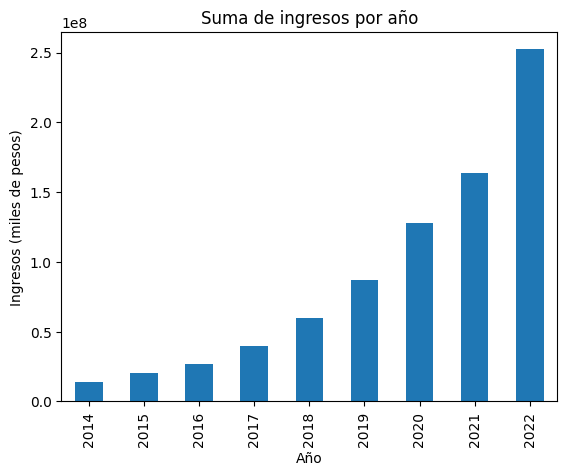

In [10]:
# Extraer el año del periodo y convertirlo a tipo numérico
internet_ingresos['Año'] = internet_ingresos['Periodo'].str.extract('(\d+)').astype(int)

# Agrupar por año y calcular la suma de los ingresos
df_agrupado = internet_ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum()

# Crear el gráfico de barras
df_agrupado.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Suma de ingresos por año')
plt.show()

* En el grafico se observa que hay crecimiento al pasar de los años, en lo que respecta al ingreso( miles de pesos)

In [11]:
dfa = internet_ingresos[['Ingresos (miles de pesos)']]

Q1 = dfa.quantile(0.25)
Q3 = dfa.quantile(0.75)
IQR = Q3 - Q1

outliers = ((dfa < (Q1 - 1.5 * IQR)) | (dfa > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = internet_ingresos[outliers]
registros_con_outliers

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022


* Observamos que hay un outlier en el cuarto trimestre del año 2022

In [12]:
# Guardamos nuestro df para posteriormente utilizarlo
internet_ingresos.to_excel('data\Internet_Ingresos (1).xlsx', index=False)

In [53]:
# Revisamos nuestro septimos df
listado_localidad_internet.head(5)

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1,0,0,0,1,1,1,0,0
1,BUENOS AIRES,9 de Julio,Carlos María Naón,0,0,0,0,1,1,1,0,0
2,BUENOS AIRES,9 de Julio,Dudignac,0,0,1,0,1,1,1,1,0
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),0,0,0,0,1,0,0,0,0
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),1,0,0,1,1,1,1,0,0


In [54]:
# Asignamos el valor de 1 a 'SI' y el valor de 0 a '--' , ademas los convertimos a tipo int para poder hacer un conteo de los datos.
listado_localidad_internet = listado_localidad_internet.replace('--', '0')
listado_localidad_internet = listado_localidad_internet.replace('SI', '1')
listado_localidad_internet = listado_localidad_internet.drop_duplicates()
listado_localidad_internet["ADSL"] = listado_localidad_internet["ADSL"].astype(int)
listado_localidad_internet["Dial Up"] = listado_localidad_internet["Dial Up"].astype(int)
listado_localidad_internet["Cablemódem"] = listado_localidad_internet["Cablemódem"].astype(int)
listado_localidad_internet["Telefonía Fija"] = listado_localidad_internet["Telefonía Fija"].astype(int)


In [55]:
# Revismoas los cambios
listado_localidad_internet.head(5)

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1,0,0,0,1,1,1,0,0
1,BUENOS AIRES,9 de Julio,Carlos María Naón,0,0,0,0,1,1,1,0,0
2,BUENOS AIRES,9 de Julio,Dudignac,0,0,1,0,1,1,1,1,0
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),0,0,0,0,1,0,0,0,0
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),1,0,0,1,1,1,1,0,0


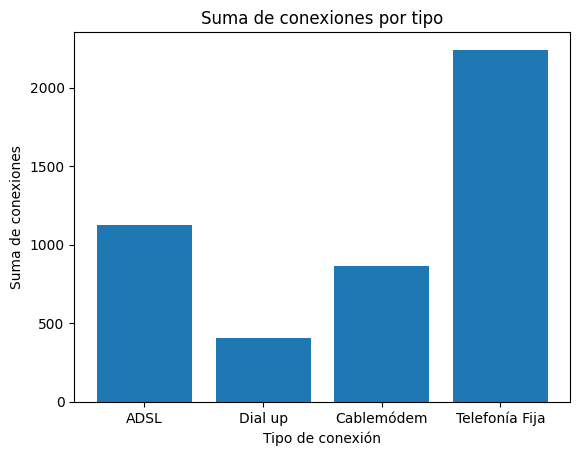

In [56]:
suma_ADSL = listado_localidad_internet["ADSL"].sum()
suma_dial_up = listado_localidad_internet["Dial Up"].sum()
suma_Cablemódem = listado_localidad_internet["Cablemódem"].sum()
suma_Telefonía_Fija = listado_localidad_internet["Telefonía Fija"].sum()

# Crear el gráfico
plt.bar(['ADSL', 'Dial up', 'Cablemódem', 'Telefonía Fija'], [suma_ADSL, suma_dial_up, suma_Cablemódem, suma_Telefonía_Fija])
plt.xlabel("Tipo de conexión")
plt.ylabel("Suma de conexiones")
plt.title("Suma de conexiones por tipo")
plt.show()

* En el grafico de barras se observa que hay mas de 2000 conexiones en telefonia fija.
* En Dial up se observa que hay menos de 500 conexiones.

In [57]:
# Guardamos nuestro df con los cambios realizados
listado_localidad_internet.to_csv('data/16-Listadodelocalidadesconconectividadainternet_2750221699377880537.csv', index=False)